### Task1: Calculating length, area, centroid and Minimum bounding box for simple polygon

In [1]:
import sys, os, math, random, json, numpy
import matplotlib.pyplot as plt

In [89]:
class Point:
    def __init__(self,x,y):
        self.lon = x # defining lon property to point object
        self.lat = y # defining lat property to point object
        
class Polyline:
    def __init__(self, points = []):
        self.points = points
        
    def getLength(self): # Euclidean distance
        Length = 0.0
        for i in range(len(self.points)-1):
            Length += math.sqrt((self.points[i+1].lon-self.points[i].lon)**2 +(self.points[i+1].lat-self.points[i].lat)**2)
        return Length

class Polygon:
    def __init__(self, points = []):
        self.points = points
        
    def getArea(self):
        area = 0.0
        for i in range(len(self.points)-1):
            area += ((self.points[i+1].lon * self.points[i].lat) - (self.points[i].lon * self.points[i+1].lat))
        return abs(area)/2
    
    def getCentroid(self):
        area = self.getArea()
        
        cx = 0.0
        cy = 0.0
        
        for i in range(len(self.points)-1):
            value = ((self.points[i].lon * self.points[i+1].lat)-(self.points[i+1].lon * self.points[i].lat))
            cx += (self.points[i].lon + self.points[i+1].lon) * value
            cy += (self.points[i].lat + self.points[i+1].lat) * value
            
        cx /= 6 * area
        cy /= 6 * area
        
        return (round(cx,2), round(cy,2))
        
    def getEnvelop(self):
        min_lon = min([point.lon for point in self.points])
        min_lat = min([point.lat for point in self.points])
        max_lon = max([point.lon for point in self.points])
        max_lat = max([point.lat for point in self.points])
        return [(min_lon, min_lat), (max_lon, max_lat)]

if __name__ == "__main__":
    pointA=Point(0, 0)
    pointB=Point(3, 0)
    pointC=Point(3, 4)
    pt_list = [pointA,pointB,pointC]
    line= Polyline(pt_list)
    print ("length: ", line.getLength())
    poly = Polygon(pt_list)
    print ("Area: ", poly.getArea())
    print ("Centroid: ", poly.getCentroid())
    print ("Bounding Box: ", poly.getEnvelop())

length:  7.0
Area:  6.0
Centroid:  (2.0, 1.33)
Bounding Box:  [(0, 0), (3, 4)]


### Task2: Flickr Photos and Convex Hull

In [2]:
# import packages
import flickrapi
import getpass

API_KEY = 'Your Flickr API Key'

API_SECRET = 'Your Flickr API secret'

In [3]:
API_KEY = getpass.getpass() # getpass has a method getpass and API_KEY is passed

········


In [4]:
API_SECRET = getpass.getpass() # getpass has a method getpass and API_SECRET is passed

········


In [5]:
# create the API class and loads the flickrapi using API key, secret
flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, cache=True)

In [6]:
# retrieve a set of photos within 1 km of Times Square, Manhattan, NY
# (lat = 40.7581, lon = -73.9855) from Google Maps

from datetime import date
photos = flickr.walk(lat=40.758, lon=-73.9855, radius=1, extras='url_c', max_upload_date= str(date.today()))


# iterate 500 photos in the photo set
counter = 0
photo_id_list = []

from itertools import islice
for photo_url in islice(photos,500): #Slicing before looping through the entire set
    # get the photo url
    url = photo_url.get('url_c')
    counter +=1
    if url is not None:
        photo_id_list.append(photo_url.get('id')) #Photo IDs are appended into the photo_id_list
        print(photo_url.get('id'), photo_url.get('url_c'))
        
print(f'Number of photos retrieved: {counter}')

52717572991 https://live.staticflickr.com/65535/52717572991_990eda0d3b_c.jpg
52714253768 https://live.staticflickr.com/65535/52714253768_a46018c6f2_c.jpg
52713891025 https://live.staticflickr.com/65535/52713891025_9089962a97_c.jpg
52706810973 https://live.staticflickr.com/65535/52706810973_1faaa075e1_c.jpg
52703134591 https://live.staticflickr.com/65535/52703134591_79ce0c7c39_c.jpg
52700575706 https://live.staticflickr.com/65535/52700575706_752ebe539f_c.jpg
28004803069 https://live.staticflickr.com/4608/28004803069_77f4827d99_c.jpg
52698315138 https://live.staticflickr.com/65535/52698315138_5d597fb9c9_c.jpg
52697822466 https://live.staticflickr.com/65535/52697822466_9498519753_c.jpg
52694643887 https://live.staticflickr.com/65535/52694643887_c87d46da6a_c.jpg
52695574455 https://live.staticflickr.com/65535/52695574455_0172aa8587_c.jpg
52695652123 https://live.staticflickr.com/65535/52695652123_39808fa04f_c.jpg
52694644662 https://live.staticflickr.com/65535/52694644662_fefdea4edc_c.jpg


52415005535 https://live.staticflickr.com/65535/52415005535_92cea111d2_c.jpg
52415070253 https://live.staticflickr.com/65535/52415070253_1c1dd63a6b_c.jpg
52413991612 https://live.staticflickr.com/65535/52413991612_708d565c62_c.jpg
52414519949 https://live.staticflickr.com/65535/52414519949_6788616283_c.jpg
52414155825 https://live.staticflickr.com/65535/52414155825_16c32da10a_c.jpg
52414061515 https://live.staticflickr.com/65535/52414061515_fb114732f2_c.jpg
52413432086 https://live.staticflickr.com/65535/52413432086_841468becf_c.jpg
52413496043 https://live.staticflickr.com/65535/52413496043_e21612f159_c.jpg
52412333778 https://live.staticflickr.com/65535/52412333778_f3c1614f07_c.jpg
52411238564 https://live.staticflickr.com/65535/52411238564_214333a6c4_c.jpg
52409635201 https://live.staticflickr.com/65535/52409635201_66d360ce52_c.jpg
52405421481 https://live.staticflickr.com/65535/52405421481_96af9852b9_c.jpg
52405859855 https://live.staticflickr.com/65535/52405859855_e3bbae8251_c.jpg

52077584153 https://live.staticflickr.com/65535/52077584153_8f9fb86944_c.jpg
52076633243 https://live.staticflickr.com/65535/52076633243_fcc35a2a66_c.jpg
52073063488 https://live.staticflickr.com/65535/52073063488_d08655928c_c.jpg
52060055596 https://live.staticflickr.com/65535/52060055596_93dd551c8b_c.jpg
52056218292 https://live.staticflickr.com/65535/52056218292_33ec75fdc0_c.jpg
52057496005 https://live.staticflickr.com/65535/52057496005_60cae5cf20_c.jpg
52057131869 https://live.staticflickr.com/65535/52057131869_43086b1b12_c.jpg
52054603945 https://live.staticflickr.com/65535/52054603945_2d49eb1e4d_c.jpg
52053303273 https://live.staticflickr.com/65535/52053303273_c76c9e6217_c.jpg
52051243723 https://live.staticflickr.com/65535/52051243723_e817034f52_c.jpg
52049093619 https://live.staticflickr.com/65535/52049093619_2589c09a9a_c.jpg
52047582039 https://live.staticflickr.com/65535/52047582039_a367ca6f94_c.jpg
52046109412 https://live.staticflickr.com/65535/52046109412_6d194feebe_c.jpg

51759603774 https://live.staticflickr.com/65535/51759603774_e34f310903_c.jpg
51757998882 https://live.staticflickr.com/65535/51757998882_23f80c6ddb_c.jpg
51759578755 https://live.staticflickr.com/65535/51759578755_aa624bbf1e_c.jpg
51757869142 https://live.staticflickr.com/65535/51757869142_4cf5702df9_c.jpg
51759523540 https://live.staticflickr.com/65535/51759523540_8a92b3712d_c.jpg
51757388022 https://live.staticflickr.com/65535/51757388022_3989ac8d3d_c.jpg
51757600806 https://live.staticflickr.com/65535/51757600806_0635e109b4_c.jpg
51756633302 https://live.staticflickr.com/65535/51756633302_27820ceaa5_c.jpg
51758012324 https://live.staticflickr.com/65535/51758012324_779947758a_c.jpg
51756395386 https://live.staticflickr.com/65535/51756395386_192393199e_c.jpg
51755652675 https://live.staticflickr.com/65535/51755652675_10f8199a19_c.jpg
51750825227 https://live.staticflickr.com/65535/51750825227_bcf5ee8f44_c.jpg
51747082134 https://live.staticflickr.com/65535/51747082134_6c64d95bcc_c.jpg

In [7]:
flickr_list = []

for photo_id in photo_id_list:
    
    #flickr.photos.getInfo is used to retrieve tags
    photo_info = flickr.photos.getInfo(photo_id=photo_id, format='json')
    photo_info_d = photo_info.decode()
    photo_info_l = json.loads(photo_info_d)
    
    #flickr.people.getInfo is used to retrieve photo counts
    flickr_user = flickr.people.getInfo(api_key = API_KEY, user_id = photo_info_l["photo"]["owner"]["nsid"], format = 'json')
    flickr_user_d = flickr_user.decode()
    flickr_user_l = json.loads(flickr_user_d)
    
    #looping through required key:value pairs from photo_info_l (dictionary)
    photo_id = photo_info_l ['photo']['id']
    latitude = photo_info_l ['photo'] ['location'] ['latitude']
    longitude = photo_info_l ['photo'] ['location'] ['longitude']
    taken_time = photo_info_l ['photo'] ['dates'] ['taken']
    url = photo_info_l ['photo'] ['urls'] ['url'][0] ['_content']
    user_id = photo_info_l ['photo'] ['owner'] ['nsid']
    username = photo_info_l ['photo'] ['owner'] ['username']
    realname = photo_info_l ['photo'] ['owner'] ['realname']
    registered_location = photo_info_l ['photo']['owner']['location']
    photos_count = flickr_user_l ['person'] ['photos'] ['count'] ['_content']
    
    #Loading photo tags into a variable - tags
    tags = photo_info_l ['photo'] ['tags'] ['tag']
    
    #if tags are not empty
    if tags is not []:
        tag_list = []
        
        #loop through the range of tags available
        for i in range(len(tags)):
            #Each tag is a list that has a key named '_content'
            tag_list.append(tags[i]['_content'])
            
        #printing for understanding whether tags are present    
        print(tag_list)
        flickr_tags = tag_list
    else:
        flickr_tags = []
    
    #printing to see organized list of all required variables
    print(f'photo_id: {photo_id}, latitude: {latitude}, longitude: {longitude}, tags: {flickr_tags} , taken_time: {taken_time}, url: {url}, user_id: {user_id}, username: {username}, realname: {realname}, registered_location: {registered_location}, photos_count: {photos_count}')
    
    #Append the list of desired variables to flickr_list
    flickr_list.append([photo_id, latitude, longitude, flickr_tags, taken_time, url, user_id, username, 
                        realname, registered_location, photos_count])

[]
photo_id: 52717572991, latitude: 40.768188, longitude: -73.973359, tags: [] , taken_time: 2023-02-26 12:35:56, url: https://www.flickr.com/photos/124549018@N05/52717572991/, user_id: 124549018@N05, username: Martin Cousture, realname: Martin Cousture, registered_location: None, photos_count: 263
['newyorkcity', 'newyork', 'unitedstates', 'museum', 'modern', 'art', 'pixel', 'pixel7', 'pro', 'google', 'android', 'smartphone', 'cellphone']
photo_id: 52714253768, latitude: 40.761569, longitude: -73.976720, tags: ['newyorkcity', 'newyork', 'unitedstates', 'museum', 'modern', 'art', 'pixel', 'pixel7', 'pro', 'google', 'android', 'smartphone', 'cellphone'] , taken_time: 2022-12-04 13:21:18, url: https://www.flickr.com/photos/joey_m43/52714253768/, user_id: 49576960@N05, username: Joey Hinton, realname: , registered_location: None, photos_count: 8976
[]
photo_id: 52713891025, latitude: 40.759127, longitude: -73.978048, tags: [] , taken_time: 2023-02-24 13:20:11, url: https://www.flickr.com/

['theater', 'broadway', '2022', 'phantomoftheopera', 'galaxys20', 'manhattan', 'july2022', 'nyc', 'newyorkcity', 'newyork', 'unitedstates']
photo_id: 52694570387, latitude: 40.758372, longitude: -73.987931, tags: ['theater', 'broadway', '2022', 'phantomoftheopera', 'galaxys20', 'manhattan', 'july2022', 'nyc', 'newyorkcity', 'newyork', 'unitedstates'] , taken_time: 2022-07-17 18:25:44, url: https://www.flickr.com/photos/joeshlabotnik/52694570387/, user_id: 40646519@N00, username: Joe Shlabotnik, realname: , registered_location: None, photos_count: 168592
[]
photo_id: 52694198737, latitude: 40.752327, longitude: -73.993539, tags: [] , taken_time: 2023-02-06 19:41:02, url: https://www.flickr.com/photos/jwtphoto/52694198737/, user_id: 31764118@N00, username: jwtPhoto.com, realname: , registered_location: Fayetteville, GA, USA, photos_count: 8089
[]
photo_id: 52694110102, latitude: 40.766924, longitude: -73.973908, tags: [] , taken_time: 2018-10-30 20:38:09, url: https://www.flickr.com/phot

[]
photo_id: 52604610776, latitude: 40.757869, longitude: -73.993134, tags: [] , taken_time: 2021-11-21 10:31:01, url: https://www.flickr.com/photos/have-a-nice-day/52604610776/, user_id: 68472396@N00, username: Stickerkitty, realname: Catherine Tedford, registered_location: USA, photos_count: 11445
['candycanes', 'newyorkcity', 'christmas', 'manhattan', 'christmasdecorations', 'nyc', 'night']
photo_id: 52602240036, latitude: 40.760276, longitude: -73.980456, tags: ['candycanes', 'newyorkcity', 'christmas', 'manhattan', 'christmasdecorations', 'nyc', 'night'] , taken_time: 2023-01-01 00:00:00, url: https://www.flickr.com/photos/nilspix/52602240036/, user_id: 74997357@N03, username: NilsPix, realname: , registered_location: None, photos_count: 4150
[]
photo_id: 52601646359, latitude: 40.743888, longitude: -73.988875, tags: [] , taken_time: 2023-01-01 17:51:09, url: https://www.flickr.com/photos/chillbill/52601646359/, user_id: 32121816@N00, username: chillbill, realname: Billy, register

['new', 'york', 'city', 'manhattan', 'midtown', 'night', 'broadway']
photo_id: 52559685546, latitude: 40.754387, longitude: -73.986891, tags: ['new', 'york', 'city', 'manhattan', 'midtown', 'night', 'broadway'] , taken_time: 2022-11-24 17:34:34, url: https://www.flickr.com/photos/wyliepoon/52559685546/, user_id: 9911655@N08, username: wyliepoon, realname: , registered_location: , photos_count: 87135
['new', 'york', 'city', 'manhattan', 'midtown', 'herald', 'square', 'broadway', 'macys', 'department', 'store', 'shop', 'shopping', 'thanksgiving', 'christmas', '34th', 'street', 'night']
photo_id: 52559983374, latitude: 40.749884, longitude: -73.987857, tags: ['new', 'york', 'city', 'manhattan', 'midtown', 'herald', 'square', 'broadway', 'macys', 'department', 'store', 'shop', 'shopping', 'thanksgiving', 'christmas', '34th', 'street', 'night'] , taken_time: 2022-11-24 17:58:28, url: https://www.flickr.com/photos/wyliepoon/52559983374/, user_id: 9911655@N08, username: wyliepoon, realname: ,

['night', 'citylife', 'famousplace', 'illuminated', 'nightlife', 'traveldestinations', 'tourist', 'retail', 'crowd', 'billboard', 'sign', 'architecture', 'shopping', 'tourism', 'walking', 'store', 'travel', 'editorial', 'cityscape', 'skyscraper', 'buildingexterior', 'builtstructure', 'lightingequipment', 'neon', 'outdoors', 'citystreet', 'streetlight', 'pedestrian', 'traffic', 'crowded', 'modern', 'busy', 'business', 'dusk', 'cultures', 'advertisement', 'commercialsign', 'internationallandmark', 'multicolored', 'businesstravel', 'motion', 'drinkestablishment']
photo_id: 52569346691, latitude: 40.757497, longitude: -73.985634, tags: ['night', 'citylife', 'famousplace', 'illuminated', 'nightlife', 'traveldestinations', 'tourist', 'retail', 'crowd', 'billboard', 'sign', 'architecture', 'shopping', 'tourism', 'walking', 'store', 'travel', 'editorial', 'cityscape', 'skyscraper', 'buildingexterior', 'builtstructure', 'lightingequipment', 'neon', 'outdoors', 'citystreet', 'streetlight', 'pede

['architecture', 'modern', 'buildingexterior', 'builtstructure', 'outdoors', 'window', 'famousplace', 'citylife', 'skyscraper', 'facade', 'design', 'cityscape', 'travel', 'glass', 'material', 'business', 'retail', 'tourism', 'futuristic', 'sign', 'reflection', 'store', 'finance', 'office', 'blue', 'illuminated', 'walking', 'financialdistrict', 'traveldestinations', 'wall', 'buildingfeature', 'shopping', 'businesstravel', 'steel', 'luxury', 'new', 'tourist', 'indoors', 'entrance', 'dusk', 'cultures', 'corporatebusiness', 'constructionindustry', 'capitalcities', 'bank', 'editorial']
photo_id: 52554884457, latitude: 40.754913, longitude: -74.000695, tags: ['architecture', 'modern', 'buildingexterior', 'builtstructure', 'outdoors', 'window', 'famousplace', 'citylife', 'skyscraper', 'facade', 'design', 'cityscape', 'travel', 'glass', 'material', 'business', 'retail', 'tourism', 'futuristic', 'sign', 'reflection', 'store', 'finance', 'office', 'blue', 'illuminated', 'walking', 'financialdist

[]
photo_id: 52537341052, latitude: 40.756827, longitude: -73.984573, tags: [] , taken_time: 2022-11-29 19:20:05, url: https://www.flickr.com/photos/judybaxter/52537341052/, user_id: 83955435@N00, username: Old Shoe Woman, realname: Judy Baxter, registered_location: Hahira, Georgia, USA, photos_count: 184304
[]
photo_id: 52537801701, latitude: 40.759322, longitude: -73.987075, tags: [] , taken_time: 2022-11-30 17:10:46, url: https://www.flickr.com/photos/judybaxter/52537801701/, user_id: 83955435@N00, username: Old Shoe Woman, realname: Judy Baxter, registered_location: Hahira, Georgia, USA, photos_count: 184304
[]
photo_id: 52538093884, latitude: 40.759322, longitude: -73.987075, tags: [] , taken_time: 2022-11-30 17:53:57, url: https://www.flickr.com/photos/judybaxter/52538093884/, user_id: 83955435@N00, username: Old Shoe Woman, realname: Judy Baxter, registered_location: Hahira, Georgia, USA, photos_count: 184304
[]
photo_id: 52538047619, latitude: 40.756386, longitude: -73.987459, 

[]
photo_id: 52504802528, latitude: 40.757644, longitude: -74.001673, tags: [] , taken_time: 2022-11-03 13:48:07, url: https://www.flickr.com/photos/rijnmondmarathonreizen/52504802528/, user_id: 108657053@N04, username: Rijnmond Marathonreizen, realname: Rijnmond Marathonreizen, registered_location: , photos_count: 36911
[]
photo_id: 52504513514, latitude: 40.767972, longitude: -73.981339, tags: [] , taken_time: 2022-11-02 14:06:50, url: https://www.flickr.com/photos/rijnmondmarathonreizen/52504513514/, user_id: 108657053@N04, username: Rijnmond Marathonreizen, realname: Rijnmond Marathonreizen, registered_location: , photos_count: 36911
[]
photo_id: 52502505805, latitude: 40.765411, longitude: -74.001914, tags: [] , taken_time: 2022-11-03 11:48:19, url: https://www.flickr.com/photos/alibray23/52502505805/, user_id: 187923772@N07, username: ali_bray23, realname: Ali Bray, registered_location: Eastington, Gloucestershire, photos_count: 3779
[]
photo_id: 52502022236, latitude: 40.758158,

['allrightsreserved']
photo_id: 52439352952, latitude: 40.756668, longitude: -73.988156, tags: ['allrightsreserved'] , taken_time: 2022-10-17 15:14:16, url: https://www.flickr.com/photos/xacobeo4/52439352952/, user_id: 148207263@N05, username: Xacobeo4, realname: xacobeo4, registered_location: None, photos_count: 2997
['tsq', 'ny', 'nyc', 'newyorknewyork', 'newyorkcity', 'newyork', 'bigapple', 'timessquare', 'cityatnight', 'newyorkatnight', 'midtownmanhattan', 'midtown', 'manhattan', 'broadway', '7thave', 'city', 'afterdark', 'dark', 'night', 'cityafterdark', 'citylights', 'lights', 'nightlights', 'neon', 'neonsign', 'empirestate', 'eastcoast', 'urban']
photo_id: 52436919246, latitude: 40.756506, longitude: -73.986439, tags: ['tsq', 'ny', 'nyc', 'newyorknewyork', 'newyorkcity', 'newyork', 'bigapple', 'timessquare', 'cityatnight', 'newyorkatnight', 'midtownmanhattan', 'midtown', 'manhattan', 'broadway', '7thave', 'city', 'afterdark', 'dark', 'night', 'cityafterdark', 'citylights', 'ligh

['streetphotography', 'nyc', 'cosplay', 'newyorkcity', 'street', 'newyork', 'unitedstates']
photo_id: 52416663260, latitude: 40.757738, longitude: -74.002173, tags: ['streetphotography', 'nyc', 'cosplay', 'newyorkcity', 'street', 'newyork', 'unitedstates'] , taken_time: 2022-10-09 14:16:29, url: https://www.flickr.com/photos/26946559@N02/52416663260/, user_id: 26946559@N02, username: kevinrubin, realname: Kevin Rubin, registered_location: New York City, New York, USA, photos_count: 59750
['new', 'york', 'nyc', 'ny', 'city', 'newyork', 'united', 'states', 'america', 'usa', 'us', 'unitedstates', 'american', 'étatsunis', 'los', 'estados', 'unidos', 'urban', 'view', 'vista', 'observation', 'deck', 'lookout', 'manhattan', 'skyscraper', 'skyscrapers', 'tower', 'towers', 'the', 'edge']
photo_id: 52512612791, latitude: 40.754393, longitude: -74.000558, tags: ['new', 'york', 'nyc', 'ny', 'city', 'newyork', 'united', 'states', 'america', 'usa', 'us', 'unitedstates', 'american', 'étatsunis', 'los

[]
photo_id: 52387237641, latitude: 40.768094, longitude: -73.992425, tags: [] , taken_time: 2022-09-23 16:58:18, url: https://www.flickr.com/photos/chillbill/52387237641/, user_id: 32121816@N00, username: chillbill, realname: Billy, registered_location: , photos_count: 54470
['newyorkcity', 'newyork', 'unitedstates']
photo_id: 52384853914, latitude: 40.766497, longitude: -73.978087, tags: ['newyorkcity', 'newyork', 'unitedstates'] , taken_time: 2022-09-25 14:33:25, url: https://www.flickr.com/photos/191170884@N06/52384853914/, user_id: 191170884@N06, username: gothamparks, realname: Gotham Parks, registered_location: New York, NY, United States, photos_count: 2008
['newyorkcity', 'newyork', 'unitedstates', 'nyc', 'usa', 'unitedstatesofamerica', 'america', 'us', 'northamerica', 'ηνωμένεσ', 'αμερικήσηπααμερικήvereinigte', 'staaten', 'von', 'amerikaamerikaetatsunisamériqueestados', 'unidos', 'de', 'americaeeuustati', 'uniti', 'damericaamerika', 'birleşik', 'devletleriアメリカ合衆国米国美国아메리카합중국미국

['newyorkcity', 'newyork', 'unitedstates']
photo_id: 52314647322, latitude: 40.757075, longitude: -73.985623, tags: ['newyorkcity', 'newyork', 'unitedstates'] , taken_time: 2022-08-27 17:36:48, url: https://www.flickr.com/photos/191170884@N06/52314647322/, user_id: 191170884@N06, username: gothamparks, realname: Gotham Parks, registered_location: New York, NY, United States, photos_count: 2008
[]
photo_id: 52311018545, latitude: 40.753916, longitude: -74.000587, tags: [] , taken_time: 2022-07-15 18:14:24, url: https://www.flickr.com/photos/jharrah87/52311018545/, user_id: 52574631@N00, username: jharrah87, realname: Drew, registered_location: Pasadena, MD, United States, photos_count: 41214
[]
photo_id: 52308645853, latitude: 40.746933, longitude: -73.986192, tags: [] , taken_time: 2022-08-22 16:25:35, url: https://www.flickr.com/photos/72403439@N05/52308645853/, user_id: 72403439@N05, username: Joshua Olivier Stokes, realname: Joshua Olivier Stokes, registered_location: Berea (Clevela

[]
photo_id: 52287537359, latitude: 40.760583, longitude: -73.975023, tags: [] , taken_time: 2022-08-10 10:49:27, url: https://www.flickr.com/photos/188497353@N06/52287537359/, user_id: 188497353@N06, username: daniel.cassany, realname: Daniel Cassany, registered_location: , photos_count: 89213
[]
photo_id: 52287756795, latitude: 40.761261, longitude: -73.977220, tags: [] , taken_time: 2022-08-10 12:12:11, url: https://www.flickr.com/photos/188497353@N06/52287756795/, user_id: 188497353@N06, username: daniel.cassany, realname: Daniel Cassany, registered_location: , photos_count: 89213
[]
photo_id: 52287275773, latitude: 40.748794, longitude: -73.985656, tags: [] , taken_time: 2022-08-10 15:02:58, url: https://www.flickr.com/photos/188497353@N06/52287275773/, user_id: 188497353@N06, username: daniel.cassany, realname: Daniel Cassany, registered_location: , photos_count: 89213
[]
photo_id: 52287267466, latitude: 40.762925, longitude: -73.987656, tags: [] , taken_time: 2022-08-10 18:14:29

['unitedstates', 'newyork']
photo_id: 52249068169, latitude: 40.758334, longitude: -73.977599, tags: ['unitedstates', 'newyork'] , taken_time: 2022-06-15 18:55:53, url: https://www.flickr.com/photos/29868194@N08/52249068169/, user_id: 29868194@N08, username: hanming_huang, realname: , registered_location: Singapore, photos_count: 110257
[]
photo_id: 52245847581, latitude: 40.769480, longitude: -73.991998, tags: [] , taken_time: 2022-07-26 18:28:58, url: https://www.flickr.com/photos/chillbill/52245847581/, user_id: 32121816@N00, username: chillbill, realname: Billy, registered_location: , photos_count: 54470
[]
photo_id: 52237602507, latitude: 40.756613, longitude: -73.969784, tags: [] , taken_time: 2021-07-10 16:16:58, url: https://www.flickr.com/photos/paulbarfoot/52237602507/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 52238898729, latitude: 40.755530, longitude: -73.972137, tags: [] , taken_time: 20

[]
photo_id: 52190930383, latitude: 40.759663, longitude: -73.984992, tags: [] , taken_time: 2021-06-14 15:16:40, url: https://www.flickr.com/photos/paulbarfoot/52190930383/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 52191393210, latitude: 40.752741, longitude: -73.969595, tags: [] , taken_time: 2021-06-28 20:08:46, url: https://www.flickr.com/photos/paulbarfoot/52191393210/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 52190968303, latitude: 40.749088, longitude: -73.970575, tags: [] , taken_time: 2021-01-23 15:14:10, url: https://www.flickr.com/photos/paulbarfoot/52190968303/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 52189940332, latitude: 40.749833, longitude: -73.969931, tags: [] , taken_time: 2021-01-23 15:42:38, url: https://www.fl

['newyork', 'newyorkcity', 'nyc', 'panasonictz200', 'panasonic', 'leica', 'tz200', 'zs200']
photo_id: 52134558695, latitude: 40.752775, longitude: -73.977330, tags: ['newyork', 'newyorkcity', 'nyc', 'panasonictz200', 'panasonic', 'leica', 'tz200', 'zs200'] , taken_time: 2022-06-01 11:06:54, url: https://www.flickr.com/photos/santiagobrikman/52134558695/, user_id: 149902718@N02, username: santiagobrikman, realname: Santiago Brikman, registered_location: Uruguay, photos_count: 113
['52522', 'diplomaticsecurityservice', 'gentrysmith', 'hybridbell', 'marketclose', 'newyorknewyork', 'assistantsecretaryfordiplomaticsecurity', 'directors', 'principaldeputyassistantsecretaries', 'carlosmatus', 'nasdaq', 'timessquare', 'closingbell']
photo_id: 52132037123, latitude: 40.756831, longitude: -73.986675, tags: ['52522', 'diplomaticsecurityservice', 'gentrysmith', 'hybridbell', 'marketclose', 'newyorknewyork', 'assistantsecretaryfordiplomaticsecurity', 'directors', 'principaldeputyassistantsecretarie

['people', 'urbanpeople', 'pocketsizemoleskine', '5bpencil', 'marciamilnerbrage']
photo_id: 52081257876, latitude: 40.755490, longitude: -73.986021, tags: ['people', 'urbanpeople', 'pocketsizemoleskine', '5bpencil', 'marciamilnerbrage'] , taken_time: 2022-05-15 20:23:05, url: https://www.flickr.com/photos/marciamilner-brage/52081257876/, user_id: 49028620@N04, username: Marcia Milner-Brage, realname: Marcia Milner-Brage, registered_location: Cedar Falls, Iowa, United States, photos_count: 2299
[]
photo_id: 52166368466, latitude: 40.766388, longitude: -73.982103, tags: [] , taken_time: 2022-06-22 13:23:20, url: https://www.flickr.com/photos/chillbill/52166368466/, user_id: 32121816@N00, username: chillbill, realname: Billy, registered_location: , photos_count: 54470
[]
photo_id: 52155304601, latitude: 40.770541, longitude: -73.992456, tags: [] , taken_time: 2022-06-18 10:08:45, url: https://www.flickr.com/photos/chillbill/52155304601/, user_id: 32121816@N00, username: chillbill, realnam

[]
photo_id: 52046109412, latitude: 40.756813, longitude: -73.996456, tags: [] , taken_time: 2016-07-10 18:12:56, url: https://www.flickr.com/photos/147877221@N04/52046109412/, user_id: 147877221@N04, username: Hubbard Family Vacations, realname: Michael Hubbard, registered_location: , photos_count: 25408
[]
photo_id: 52047348684, latitude: 40.768731, longitude: -73.977340, tags: [] , taken_time: 2016-07-12 11:24:22, url: https://www.flickr.com/photos/147877221@N04/52047348684/, user_id: 147877221@N04, username: Hubbard Family Vacations, realname: Michael Hubbard, registered_location: , photos_count: 25408
[]
photo_id: 52045062412, latitude: 40.751550, longitude: -74.002014, tags: [] , taken_time: 2022-05-02 12:43:18, url: https://www.flickr.com/photos/apuch/52045062412/, user_id: 31397006@N00, username: Apuch, realname: , registered_location: None, photos_count: 11653
[]
photo_id: 52046149778, latitude: 40.760788, longitude: -73.989931, tags: [] , taken_time: 2022-05-01 19:50:59, url:

['newyork', 'amtrak', 'trainstation', 'acela']
photo_id: 51959164953, latitude: 40.751305, longitude: -73.995134, tags: ['newyork', 'amtrak', 'trainstation', 'acela'] , taken_time: 2022-03-16 15:55:13, url: https://www.flickr.com/photos/thewestend/51959164953/, user_id: 69754957@N00, username: The West End, realname: , registered_location: , photos_count: 27275
['usa', 'unitedstatesofamerica', 'us', 'newyork', 'ny', 'color', 'red', 'purple', 'davidbyrne', 'colour', 'stage', 'group', 'music', 'musical', 'performance', 'bf:blogitem=23981']
photo_id: 51950244370, latitude: 40.756798, longitude: -73.989229, tags: ['usa', 'unitedstatesofamerica', 'us', 'newyork', 'ny', 'color', 'red', 'purple', 'davidbyrne', 'colour', 'stage', 'group', 'music', 'musical', 'performance', 'bf:blogitem=23981'] , taken_time: 2022-03-17 21:32:49, url: https://www.flickr.com/photos/mastababa/51950244370/, user_id: 78303790@N00, username: MastaBaba, realname: Babak Fakhamzadeh, registered_location: São Paulo, Braz

[]
photo_id: 51896510539, latitude: 40.753550, longitude: -73.967298, tags: [] , taken_time: 2021-01-12 16:00:29, url: https://www.flickr.com/photos/paulbarfoot/51896510539/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 51896221956, latitude: 40.753008, longitude: -73.969525, tags: [] , taken_time: 2021-03-20 18:37:11, url: https://www.flickr.com/photos/paulbarfoot/51896221956/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 51895250917, latitude: 40.749702, longitude: -73.970334, tags: [] , taken_time: 2021-03-05 14:52:31, url: https://www.flickr.com/photos/paulbarfoot/51895250917/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 51896541714, latitude: 40.749094, longitude: -73.970606, tags: [] , taken_time: 2021-02-27 16:49:27, url: https://www.fl

['geo:lat=4075483680', 'geo:lon=7398412150', 'geotagged', 'newyork', 'timessquare', 'unitedstates', 'usa']
photo_id: 51875290801, latitude: 40.754836, longitude: -73.984123, tags: ['geo:lat=4075483680', 'geo:lon=7398412150', 'geotagged', 'newyork', 'timessquare', 'unitedstates', 'usa'] , taken_time: 2018-09-03 18:09:18, url: https://www.flickr.com/photos/lodekka/51875290801/, user_id: 87347455@N00, username: HHA124L, realname: Chris Sampson, registered_location: , photos_count: 17577
['elieballeh', 'fashionshow', 'nyfwfw22', 'newyorkcity', 'newyork', 'unitedstates']
photo_id: 51875896670, latitude: 40.753061, longitude: -73.995417, tags: ['elieballeh', 'fashionshow', 'nyfwfw22', 'newyorkcity', 'newyork', 'unitedstates'] , taken_time: 2022-02-09 19:33:43, url: https://www.flickr.com/photos/cwills4/51875896670/, user_id: 11161183@N06, username: Chaz Wills, realname: Charles Wills, registered_location: Monroe, CT, USA, photos_count: 29401
['elieballeh', 'fashionshow', 'nyfwfw22', 'newyork

[]
photo_id: 51895335907, latitude: 40.755555, longitude: -73.971945, tags: [] , taken_time: 2021-07-04 22:39:45, url: https://www.flickr.com/photos/paulbarfoot/51895335907/, user_id: 46681937@N00, username: paul.barfoot, realname: Paul Barfoot, registered_location: , photos_count: 73652
[]
photo_id: 51887005115, latitude: 40.761402, longitude: -73.977164, tags: [] , taken_time: 2021-07-09 14:51:00, url: https://www.flickr.com/photos/superfluous/51887005115/, user_id: 55673754@N00, username: kmurf, realname: , registered_location: berkeley, photos_count: 27184
['streetphotography', 'stockings', 'street', 'newyorkcity', 'nyc', 'newyork', 'unitedstates']
photo_id: 51878317034, latitude: 40.762555, longitude: -73.985845, tags: ['streetphotography', 'stockings', 'street', 'newyorkcity', 'nyc', 'newyork', 'unitedstates'] , taken_time: 2022-02-12 13:50:17, url: https://www.flickr.com/photos/26946559@N02/51878317034/, user_id: 26946559@N02, username: kevinrubin, realname: Kevin Rubin, registe

['map']
photo_id: 51849393050, latitude: 40.756977, longitude: -74.001725, tags: ['map'] , taken_time: 2018-10-04 14:52:55, url: https://www.flickr.com/photos/onetreeplanted/51849393050/, user_id: 193744526@N04, username: One Tree Planted, realname: One Tree Planted, registered_location: , photos_count: 18876
['skyscraper', 'architecture', 'building', 'tall', 'newyorkcity', 'newyorkny', 'newyorknewyork', 'bigapple', 'skyline', 'ny', 'nyc', 'america', 'us', 'usa', 'fuji', 'bluesky', 'sun', 'sunnyday', 'chryslerbuilding', 'artdeco', 'chrome', 'walterpchrysler', 'chyrsler', 'chrysler', 'midtownmanhattan', 'midtown', 'newyork', 'city', 'empirestate', 'eastcoast', 'urban']
photo_id: 51838062068, latitude: 40.751580, longitude: -73.975528, tags: ['skyscraper', 'architecture', 'building', 'tall', 'newyorkcity', 'newyorkny', 'newyorknewyork', 'bigapple', 'skyline', 'ny', 'nyc', 'america', 'us', 'usa', 'fuji', 'bluesky', 'sun', 'sunnyday', 'chryslerbuilding', 'artdeco', 'chrome', 'walterpchrysl

['newyorkcity', 'streetphotography', 'street', 'nyc', 'newyork', 'unitedstates']
photo_id: 51777634895, latitude: 40.759238, longitude: -73.977312, tags: ['newyorkcity', 'streetphotography', 'street', 'nyc', 'newyork', 'unitedstates'] , taken_time: 2021-12-25 19:03:14, url: https://www.flickr.com/photos/26946559@N02/51777634895/, user_id: 26946559@N02, username: kevinrubin, realname: Kevin Rubin, registered_location: New York City, New York, USA, photos_count: 59750
['mariopolicorsi', 'canon', 'eos', '700d', 'fisheye', 'samyang', '8mm', '2021', 'inverno', 'winter', 'hdr', 'hdraward', 'simplysuperb', 'photoshop', 'photomatix', 'photography', 'photo', 'grandemela', 'foto', 'fotografia', 'rockefeller', 'palla', 'christmas', 'natale', 'newyork', 'america', 'usa', 'acqua', 'water', 'waterscapes', 'fontana', 'fontane', 'città', 'city', 'citylife', 'capitale', 'viaggio', 'travel', 'dicembre', 'december', 'architecture', 'architettura']
photo_id: 51776398786, latitude: 40.760045, longitude: -7

['elieballeh', 'elieballehbirthdaybash', 'elieballehcom', 'skorpios']
photo_id: 51761296044, latitude: 40.760661, longitude: -73.974695, tags: ['elieballeh', 'elieballehbirthdaybash', 'elieballehcom', 'skorpios'] , taken_time: 2021-12-19 00:02:20, url: https://www.flickr.com/photos/cwills4/51761296044/, user_id: 11161183@N06, username: Chaz Wills, realname: Charles Wills, registered_location: Monroe, CT, USA, photos_count: 29401
['elieballeh', 'elieballehbirthdaybash', 'elieballehcom', 'skorpios']
photo_id: 51761133269, latitude: 40.760647, longitude: -73.974673, tags: ['elieballeh', 'elieballehbirthdaybash', 'elieballehcom', 'skorpios'] , taken_time: 2021-12-18 23:19:15, url: https://www.flickr.com/photos/cwills4/51761133269/, user_id: 11161183@N06, username: Chaz Wills, realname: Charles Wills, registered_location: Monroe, CT, USA, photos_count: 29401
[]
photo_id: 51806689032, latitude: 40.768094, longitude: -73.994684, tags: [] , taken_time: 2022-01-07 06:05:08, url: https://www.fli

['blackwhite', 'nyc', 'i❤ny', 'nyny', 'nycity', 'nycnights', 'nyinblackwhite', 'thebig🍎', 'nystreets', 'nystateofmind', 'manhattan', 'newyorknewyork', 'nyatnight', 'atlas', 'rockefellercenter', '5thave', 'littletownblues', 'canon', 'canonr', 'monochrome', 'backinthenygroove', 'scenicny', 'streetlife', 'streetscene', 'amazingcity']
photo_id: 51747082134, latitude: 40.758936, longitude: -73.977087, tags: ['blackwhite', 'nyc', 'i❤ny', 'nyny', 'nycity', 'nycnights', 'nyinblackwhite', 'thebig🍎', 'nystreets', 'nystateofmind', 'manhattan', 'newyorknewyork', 'nyatnight', 'atlas', 'rockefellercenter', '5thave', 'littletownblues', 'canon', 'canonr', 'monochrome', 'backinthenygroove', 'scenicny', 'streetlife', 'streetscene', 'amazingcity'] , taken_time: 2021-12-13 18:31:45, url: https://www.flickr.com/photos/146838317@N05/51747082134/, user_id: 146838317@N05, username: donmai651, realname: Donato Mailano, registered_location: City of Oz, photos_count: 1778
['new', 'york', 'city', 'central', 'park

['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays']
photo_id: 51702208841, latitude: 40.757326, longitude: -74.002490, tags: ['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays'] , taken_time: 2021-11-20 16:38:01, url: https://www.flickr.com/photos/carlosasmithbm/51702208841/, user_id: 8365266@N05, username: Carlos A Smith Photography, realname: Carlos A Smith, registered_location: Jamaica Queens, USA, photos_count: 45137
['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays']
photo_id: 51703075625, latitude: 40.757326, longitude: -74.002490, tags: ['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays'] , taken_time: 2021-11-20 16:18:31, url: https://www.flickr.com/photos/carlosasmithbm/51703075625/, user_id: 8365266@N05, username: Carlos A Smith Photography, realname: Carlos A Smith, registered_location: Jamaica Queens, USA, photos_count: 45137
['newyorkcity', 'nyc', 'usa', '2021', 'urbansky', 'urban', 'cityscape', 'architecture']
photo_id

['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays']
photo_id: 51700523148, latitude: 40.757782, longitude: -74.002597, tags: ['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays'] , taken_time: 2021-11-19 17:30:59, url: https://www.flickr.com/photos/carlosasmithbm/51700523148/, user_id: 8365266@N05, username: Carlos A Smith Photography, realname: Carlos A Smith, registered_location: Jamaica Queens, USA, photos_count: 45137
['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays']
photo_id: 51701129640, latitude: 40.757782, longitude: -74.002597, tags: ['anime', 'nyc', '2021', 'jacob', 'javtis', 'center', 'cosplays'] , taken_time: 2021-11-19 17:27:23, url: https://www.flickr.com/photos/carlosasmithbm/51701129640/, user_id: 8365266@N05, username: Carlos A Smith Photography, realname: Carlos A Smith, registered_location: Jamaica Queens, USA, photos_count: 45137
['vessel']
photo_id: 51681738107, latitude: 40.753905, longitude: -74.002267, tags: ['vessel'] ,

In [8]:
#converting flickr_list into Pandas DataFrame
import pandas as pd
flickr_df = pd.DataFrame(flickr_list, columns = ['photo_id', 'latitude', 'longitude', 'tags', 'taken_time', 'url', 'user_id', 'username', 
                        'realname', 'registered_location', 'photos_count'] )

GMaps API = 'Register on Google Maps Platform and get your API Key'

In [9]:
import googlemaps
gmaps = googlemaps.Client(key='insert your key')

# Geocoding an address
geocode_result = gmaps.geocode('Croydon')               
geocode_result

[{'address_components': [{'long_name': 'Croydon',
    'short_name': 'Croydon',
    'types': ['locality', 'political']},
   {'long_name': 'Greater London',
    'short_name': 'Greater London',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'England',
    'short_name': 'England',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United Kingdom',
    'short_name': 'GB',
    'types': ['country', 'political']}],
  'formatted_address': 'Croydon, UK',
  'geometry': {'bounds': {'northeast': {'lat': 51.40585189999999,
     'lng': -0.0106914},
    'southwest': {'lat': 51.3298043, 'lng': -0.1537876}},
   'location': {'lat': 51.3769529, 'lng': -0.0956895},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 51.40585189999999, 'lng': -0.0106914},
    'southwest': {'lat': 51.3298043, 'lng': -0.1537876}}},
  'place_id': 'ChIJcxZChCr-dUgRRUkMxV3ydNU',
  'types': ['locality', 'political']}]

In [10]:
geocode_result[0]['geometry']['location']

{'lat': 51.3769529, 'lng': -0.0956895}

In [11]:
def geocode_res_lng(row, registered_location):
    try:
        import googlemaps
        gmaps = googlemaps.Client(key = 'insert your key')
        if registered_location is not None or registered_location != '':
            geocode_result = gmaps.geocode(str(registered_location))
            return geocode_result[0]['geometry']['location']['lng']
        else:
            return -999
    except:
        return -9999
    

def geocode_res_lat(row, registered_location):
    try:
        import googlemaps
        gmaps = googlemaps.Client(key = 'insert your key')
        if registered_location is not None or registered_location != '':
            geocode_result = gmaps.geocode(str(registered_location))
            return geocode_result[0]['geometry']['location']['lat']
        else:
            return -999
    except:
        return -9999

In [12]:
flickr_df['reg_longitude'] = flickr_df.apply(lambda row: geocode_res_lng(row, row['registered_location']), axis = 1)
flickr_df['reg_latitude'] = flickr_df.apply(lambda row: geocode_res_lat(row, row['registered_location']), axis = 1)

In [19]:
filtered_df = flickr_df.loc[(flickr_df['reg_longitude'] == -9999) & (flickr_df['reg_latitude'] == -9999)]
flickr_df.drop(filtered_df.index, inplace=True)

In [20]:
flickr_df.to_csv('Times_square_cleaned.csv')

In [22]:
flickr_df.columns.values

array(['photo_id', 'latitude', 'longitude', 'tags', 'taken_time', 'url',
       'user_id', 'username', 'realname', 'registered_location',
       'photos_count', 'reg_longitude', 'reg_latitude'], dtype=object)

In [48]:
import geopandas as gpd

flickr_gdf = gpd.GeoDataFrame(flickr_df, geometry = gpd.points_from_xy(flickr_df['reg_longitude'], flickr_df['reg_latitude'], crs = 'EPSG:4326'))

C:\Users\Sidrcs\anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

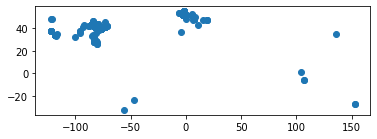

In [49]:
flickr_gdf.plot()

In [62]:
flickr_gdf = flickr_gdf.to_crs(epsg = 4326)
flickr_gs = flickr_df.geometry

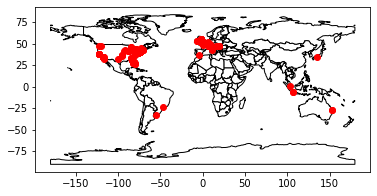

In [51]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')

flickr_gdf.plot(ax=ax, color='red')
plt.show()

In [80]:
zipfile = 'cb_2018_us_state_20m.zip'
us_gdf = gpd.read_file(zipfile)
us_gdf = us_gdf.to_crs(epsg=4326)
us_gdf = us_gdf[(us_gdf['NAME'] != 'Alaska') & (us_gdf['NAME'] != 'Hawaii')]
us_gdf['country'] = 'US'

In [82]:
us_gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,country
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",US
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",US
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",US
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",US
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",US
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",US
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",US
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",US
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",US
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",US


In [83]:
us_country_gdf = us_gdf.dissolve(by = 'country')

In [84]:
us_country_gdf

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
country,,,,,,,,,,
US,"MULTIPOLYGON (((-67.94122 18.12693, -67.89629 ...",24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958


In [85]:
us_gs = us_country_gdf.geometry[0]

In [86]:
flickr_us_gdf = flickr_gdf[flickr_gdf.within(us_gs)]

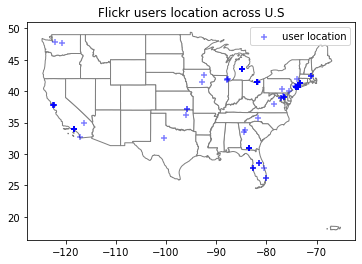

In [102]:
ax = us_gdf.plot(color='white', edgecolor='grey')
flickr_us_gdf.plot(ax=ax, marker = '+', color='blue', label = 'user location', alpha = 0.5)

plt.title('Flickr users location across U.S')
plt.legend()
plt.show()

In [105]:
convex_hull_gs = flickr_us_gdf.geometry

In [106]:
convex_hull = convex_hull_gs.convex_hull

In [108]:
envelope = convex_hull.envelope

<AxesSubplot:>

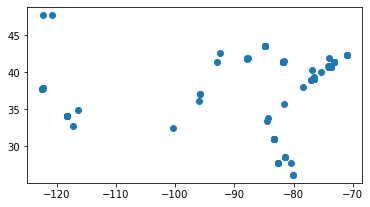

In [110]:
envelope.plot()

In [128]:
data_points_geom = []

for row in flickr_us_gdf.itertuples():
    data_points_geom.append((row.reg_longitude, row.reg_latitude))

### Task 3: K-Means Algorithm

In [121]:
# creating random centroid values from data_points list 
def generate_random_centroid(data_points):
    return data_points[random.randint(0,len(data_points)-1)]

# Euclidean distance between point and centroid
def calculate_distance(point, centroid):
    distance = math.sqrt((point[0]-centroid[0])**2 + (point[1]-centroid[1])**2)
    return distance

# updating centroid with cluster labels (need understanding of if & else statement)
def update_centroid(data_points, cluster_labels, cluster_number):
    sum_x = 0
    sum_y = 0
    count = 0
    for point in data_points:
        if cluster_labels[point] == cluster_number:
            sum_x += point[0]
            sum_y += point[1]
            count += 1
    if count > 0:
        return (sum_x/count, sum_y/count)
    else:
        return generate_random_centroid(data_points)

In [122]:
def KMeans_Clustering(k, max_iterations, data_points):
    centroids={} # create an empty dictionary to store centroids of the clusters
    cluster_labels = {} # create an empty dictionary to store the cluster label for each data point
    
    # Initialize random centroids or choose k points from the input data as the initial centroids
    for i in range (k):
        centroids[i] = generate_random_centroid(data_points)
    
    for j in range(max_iterations): 
        # Assignment: K clusters are created by associating each data point with the nearest centroid.
        for eachpoint in data_points:
            dist_min = 99999999
            for i in range (k):
                distance=calculate_distance(eachpoint,centroids[i])
                if distance < dist_min:
                    dist_min=distance
                    cluster_labels[eachpoint]=i
        
        # Update: Iterate each cluster and compute its new centroid based on current assignment
        for i in range (k):
            centroids[i] = update_centroid(data_points, cluster_labels, i)
        return cluster_labels

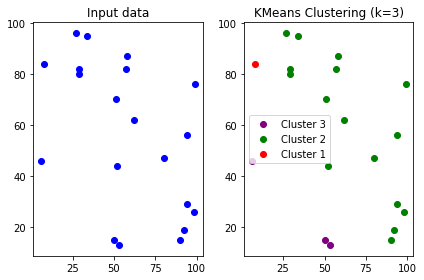

In [123]:
# Generate random data points
data_points = data_points_geom

# Perform KMeans clustering
k = 3
max_iterations = 100
cluster_labels = KMeans_Clustering(k, max_iterations, data_points)

# Separate the data points by their cluster label
clusters = {}
for point, label in cluster_labels.items():
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(point)

# Plot the input data points
plt.subplot(1,2,1)
x = [data[0] for data in data_points]
y = [data[1] for data in data_points]
plt.scatter(x, y, color='blue', label='Input Data')
plt.title('Input data')

# Plot the output clusters
plt.subplot(1,2,2)
colors = ['red', 'green', 'purple']
for label, points in clusters.items():
    x, y = [val[0] for val in points], [val[1] for val in points]
    plt.scatter(x, y, color=colors[label], label=f'Cluster {label+1}')

plt.title(f'KMeans Clustering (k={k})')
plt.legend()
plt.tight_layout()